In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading Dataframes

In [2]:
death_df = pd.read_csv('Death Dataset.csv')
injury_df = pd.read_csv('Injury Dataset.csv')
damages_df = pd.read_csv('Damages Dataset.csv')
damaged_crops_df = pd.read_csv('Crops Dataset.csv')
crops_prices_df = pd.read_csv('Crops Price Dataset.csv')
population_df = pd.read_csv('Effected Population Dataset.csv')
relief_df = pd.read_csv('Flood Relief Dataset.csv')
rainfall_df = pd.read_csv('Rainfall Dataset.csv')

    Death Toll Analysis

In [9]:
processed_death_df = death_df.drop(3)

,Province,Male,Female,Children,Total
0,AJ&K,31,17,0,48
1,Balochistan,136,73,90,299
2,GB,5,11,6,22
4,KP,149,41,116,306
5,Punjab,94,47,50,191
6,Sindh,262,126,290,678


C:\Users\max55\AppData\Local\Temp\ipykernel_7668\2552126995.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  counts = processed_death_df.groupby(['Province'])['Male', 'Female', 'Children'].sum()


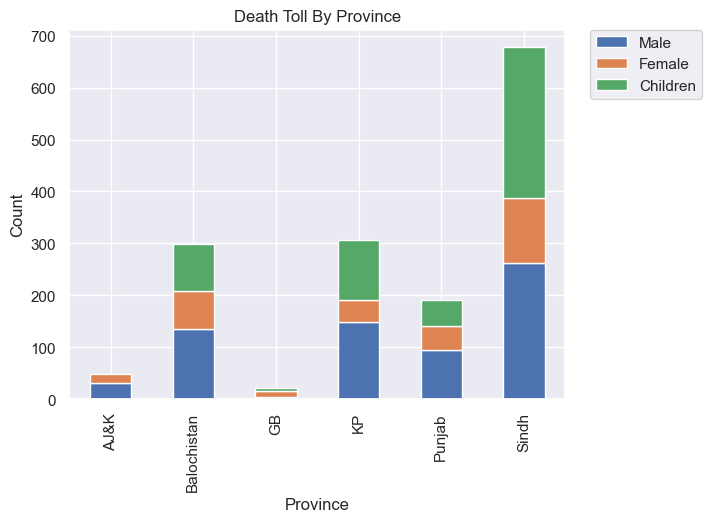

In [12]:
counts = processed_death_df.groupby(['Province'])['Male', 'Female', 'Children'].sum()

# Create a stacked bar chart of the counts by year and element type
sns.set_palette('husl')
sns.set(font='Arial')
counts.plot(kind='bar', stacked=True)
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Death Toll By Province')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As we can see that Sindh has the most male, female and children deaths which makes it the region with the highest deaths overall.

We can also see that no children died in AJ&K and ICT while GB shows a low fatality rate which also makes it one of the region with the lowest deaths overall.

Balochistan and KP have almost similar stats making them the second highest province overall while Punjab just falls behind.

    Injury Analysis

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\571950148.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  counts = processed_death_df.groupby(['Province'])['Male', 'Female', 'Children'].sum()


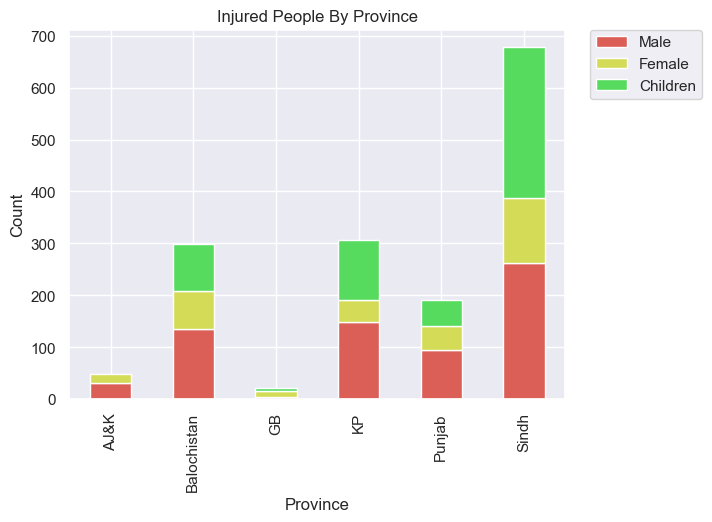

In [18]:
counts = processed_death_df.groupby(['Province'])['Male', 'Female', 'Children'].sum()

# Create a stacked bar chart of the counts by year and element type
sns.set_palette('hls')
# sns.set(font='Arial')
counts.plot(kind='bar', stacked=True)
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Injured People By Province')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As we can see that there were no injuries in GB and ICT and little to none in AJ&K, Balochistan and KP

Sindh has the most injuries in the country from which the children were the most affected followed by men

Punjab has the second highest injuries in the country from which men have the most injuries

    Analysis of Rainfall

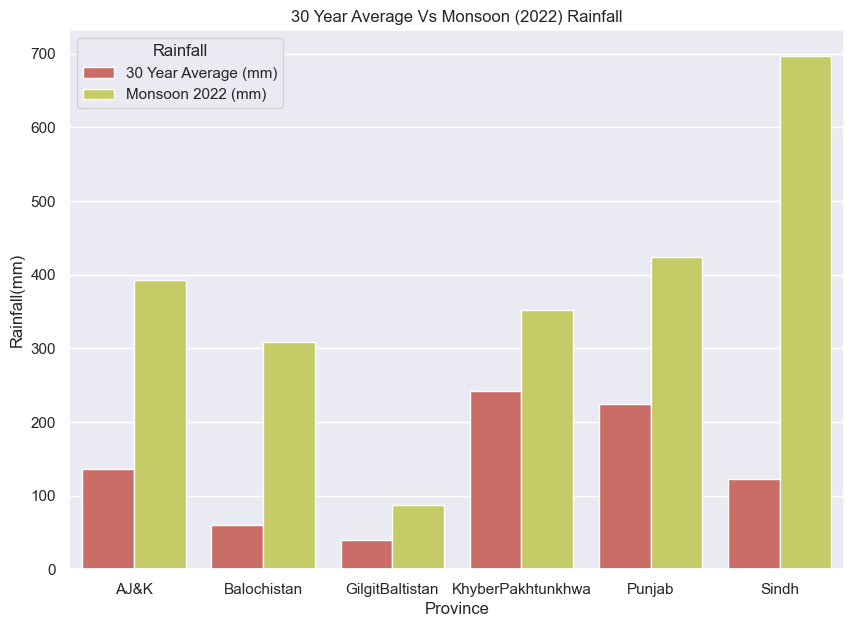

In [62]:
dfs = rainfall_df.drop(labels=[0],axis=0)

dfs1 = pd.melt(dfs, id_vars = "Province")
dfs1 = dfs1.rename(columns={"variable": "Rainfall","value":"Rainfall(mm)"})

sns.set_palette('hls')

fig, ax = plt.subplots(figsize=(10,7))

sns.barplot(x='Province', y='Rainfall(mm)', hue='Rainfall', data=dfs1, ax=ax)

ax.set_xlabel('Province')
ax.set_ylabel('Rainfall(mm)')
ax.set_title('30 Year Average Vs Monsoon (2022) Rainfall')

plt.show()

As we can see that all provinces experienced more rainfall than 30 year average in the country

Sindh has seen the most rainfall increase while GB has seen a little increase in its rainfall

Punjab is the second highest region with rainfall increase followed by AJ&K

    Analysis of Damage caused by Flood

Analysis of road damage

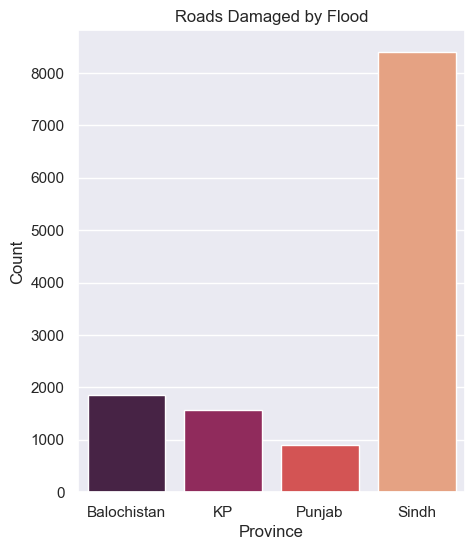

In [76]:
processed_damages_df = damages_df.drop(labels=['Bridge','PD Houses','FD Houses','Livestock'],axis=1)

processed_damages_df.drop(0,inplace=True)
processed_damages_df.drop(2,inplace=True)
processed_damages_df.drop(3,inplace=True)

plt.figure(figsize=(5,6))
sns.set(font='Arial')

ax = sns.barplot(x='Province',y='Road', data=processed_damages_df,palette="rocket")
ax.set(xlabel='Province', ylabel='Count', title='Roads Damaged by Flood')

plt.show()

The above graph shows us that the number of roads destroyed in Sindh are over 8000 making it the region with the highest damage while ICT, AJ&K and GB have little to none damage

Balochistan is the second highest region with road damage as it falls a bit short of the 2000 mark, it is followed by KP and Punjab

Analysis of Damaged Bridges

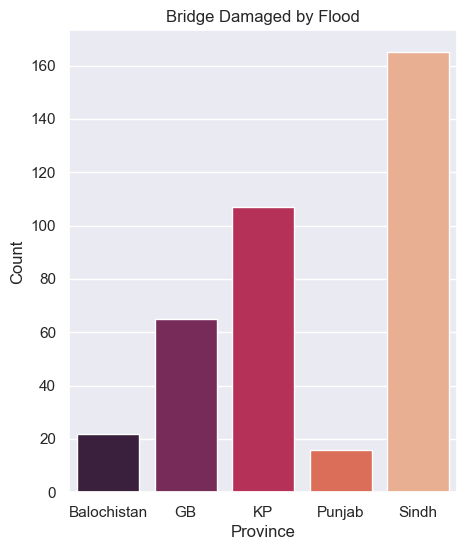

In [79]:
processed_damages_df = damages_df.drop(labels=['Road','PD Houses','FD Houses','Livestock'],axis=1)

processed_damages_df.drop(0,inplace=True)
processed_damages_df.drop(3,inplace=True)

plt.figure(figsize=(5,6))
sns.set(font='Arial')

ax = sns.barplot(x='Province',y='Bridge', data=processed_damages_df,palette="rocket")
ax.set(xlabel='Province', ylabel='Count', title='Bridge Damaged by Flood')

plt.show()

The graph shows that Sindh has the highest bridge damage which is over 160 bridges followed by KP with about 110 and GB with about 65 bridges

Punjab and Balochistan has faced little bridge damage which is around 20 bridges

AJ&K and ICT faced no bridge damage

Analysis of Livestock Loss

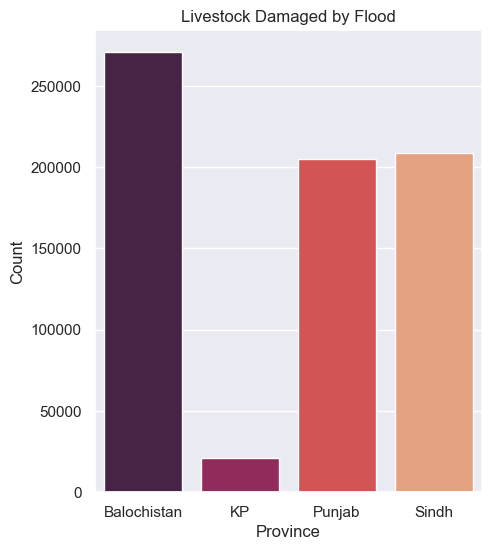

In [80]:
processed_damages_df = damages_df.drop(labels=['Road','PD Houses','FD Houses','Bridge'],axis=1)

processed_damages_df.drop(0,inplace=True)
processed_damages_df.drop(2,inplace=True)
processed_damages_df.drop(3,inplace=True)

plt.figure(figsize=(5,6))
sns.set(font='Arial')

ax = sns.barplot(x='Province',y='Livestock', data=processed_damages_df,palette="rocket")
ax.set(xlabel='Province', ylabel='Count', title='Livestock Damaged by Flood')

plt.show()

The graph shows that Balochistan has faced the most livestock loss in the country followed by Punjab and Sindh who experienced around 200000 livestock loss

KP and AJ&K faced very small livestock loss while GB and ICT faced none

Analysis of Partially Destroyed houses and Fully Destroyed houses

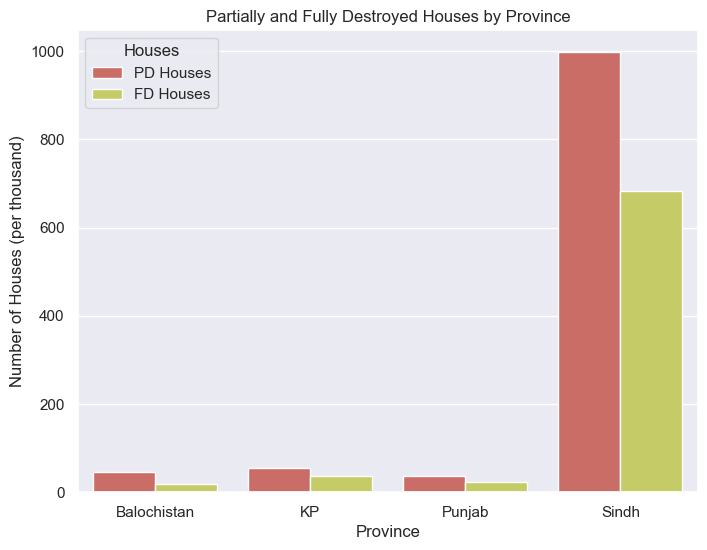

In [88]:
processed_damages_df = damages_df.drop(labels=['Road','Livestock','Bridge'],axis=1)

processed_damages_df.drop(0,inplace=True)
processed_damages_df.drop(2,inplace=True)
processed_damages_df.drop(3,inplace=True)

dfs1 = pd.melt(processed_damages_df, id_vars = "Province")
dfs1 = dfs1.rename(columns={"variable": "Houses","value":"Count"})

dfs1["Count"] = dfs1["Count"] / 1000

sns.set_palette('hls')

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x='Province', y='Count', hue='Houses', data=dfs1, ax=ax)

ax.set_xlabel('Province')
ax.set_ylabel('Number of Houses (per thousand)')
ax.set_title('Partially and Fully Destroyed Houses by Province')

plt.show()

Sindh has the most PD and FD houses in the country which clearly shows which province needs the most relief in terms of housing repair costs

Balochistan and KP show large number of PD houses after Sindh

While AJ&K, GB and ICT show no damage to houses

    Analysis of Crop Damage in Sindh

Analysis of Rice production loss

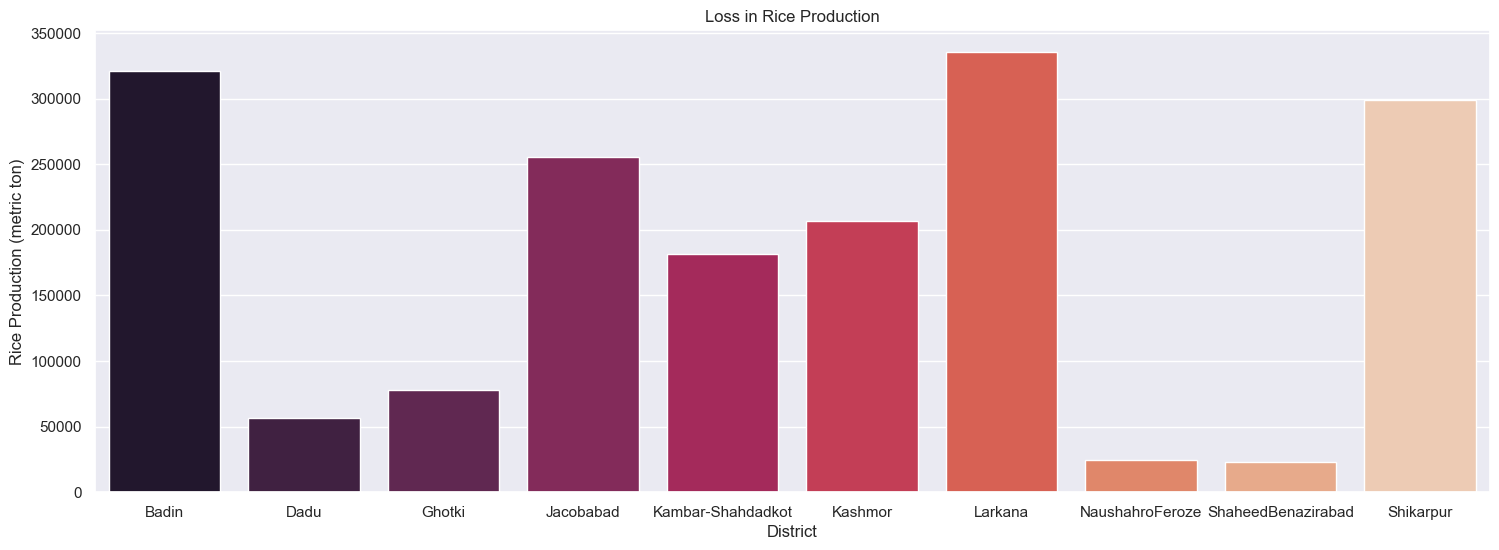

In [117]:
processed_damaged_crops = damaged_crops_df.drop(labels=['Cotton production loss (bales)','Sugarcane production loss (metric tons)'],axis=1)
processed_damaged_crops.dropna(inplace=True)

clean_loss_list = []

lis = processed_damaged_crops['Rice production loss (metric tons)'].to_list()
for i in lis:
    temp = ''
    for x in i.split(','):
        temp = temp + x
    clean_loss_list.append(temp)

processed_damaged_crops['Rice production loss (metric tons)'] = clean_loss_list

processed_damaged_crops['Rice production loss (metric tons)'] = processed_damaged_crops['Rice production loss (metric tons)'].astype('int64')

processed_damaged_crops.reset_index(inplace=True)

processed_damaged_crops.drop(3,inplace=True)
processed_damaged_crops.drop(7,inplace=True)
processed_damaged_crops.drop(9,inplace=True)
processed_damaged_crops.drop(11,inplace=True)
processed_damaged_crops.drop(14,inplace=True)
processed_damaged_crops.drop(15,inplace=True)
processed_damaged_crops.drop(16,inplace=True)

plt.figure(figsize=(18, 6))
sns.set_palette('hls')
ax = sns.barplot(x='District',y='Rice production loss (metric tons)', data=processed_damaged_crops,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Loss in Rice Production')
ax.set_ylabel(ylabel='Rice Production (metric ton)')
# plt.tight_layout()
plt.show()
#Rice Cotton and Sugarcane will have seperate graphs

As we can see that Larkana faced the most rice production loss followed by Badin and Shikarpur

Hyderabad, Khairpur, Mirpurkhas, Sanghar and Sukkur faced almost no rice production loss

Jacobabad and Kashmor experienced moderate amount of rice production loss, they come in just behind Shikarpur

Analysis of Cotton production loss

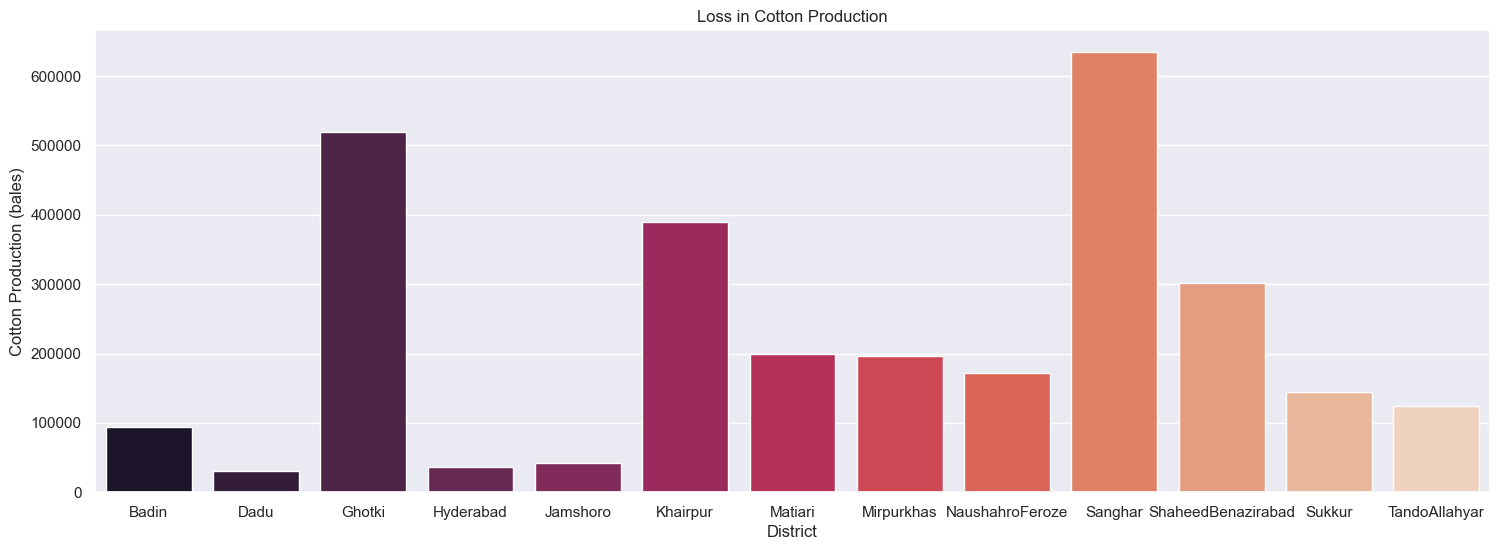

In [119]:
processed_damaged_crops = damaged_crops_df.drop(labels=['Rice production loss (metric tons)','Sugarcane production loss (metric tons)'],axis=1)
processed_damaged_crops.dropna(inplace=True)
processed_damaged_crops = processed_damaged_crops[processed_damaged_crops['Cotton production loss (bales)'] != 'nr']

clean_loss_list = []

lis = processed_damaged_crops['Cotton production loss (bales)'].to_list()
for i in lis:
    temp = ''
    for x in i.split(','):
        temp = temp + x
    clean_loss_list.append(temp)

processed_damaged_crops['Cotton production loss (bales)'] = clean_loss_list

processed_damaged_crops['Cotton production loss (bales)'] = processed_damaged_crops['Cotton production loss (bales)'].astype('int64')

processed_damaged_crops.reset_index(inplace=True)

processed_damaged_crops.drop(12,inplace=True)
processed_damaged_crops.drop(14,inplace=True)
processed_damaged_crops.drop(15,inplace=True)
processed_damaged_crops.drop(16,inplace=True)
# processed_damaged_crops.drop(14,inplace=True)
# processed_damaged_crops.drop(15,inplace=True)
# processed_damaged_crops.drop(16,inplace=True)

plt.figure(figsize=(18, 6))
sns.set_palette('hls')
ax = sns.barplot(x='District',y='Cotton production loss (bales)', data=processed_damaged_crops,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Loss in Cotton Production')
ax.set_ylabel(ylabel='Cotton Production (bales)')
# plt.tight_layout()
plt.show()
#Rice Cotton and Sugarcane will have seperate graphs

As we can see in the graph above that Sanghar and Ghotki experienced the most loss in Cotton which was around 550000 bales

This was followed by Khairpur and ShaheedBenazirabad who faced loss of about 350000 bales 

Thatta, Hyderabad and Dadu were the regions which faced minor loss in cotton production

Analysis of Sugarcane production loss

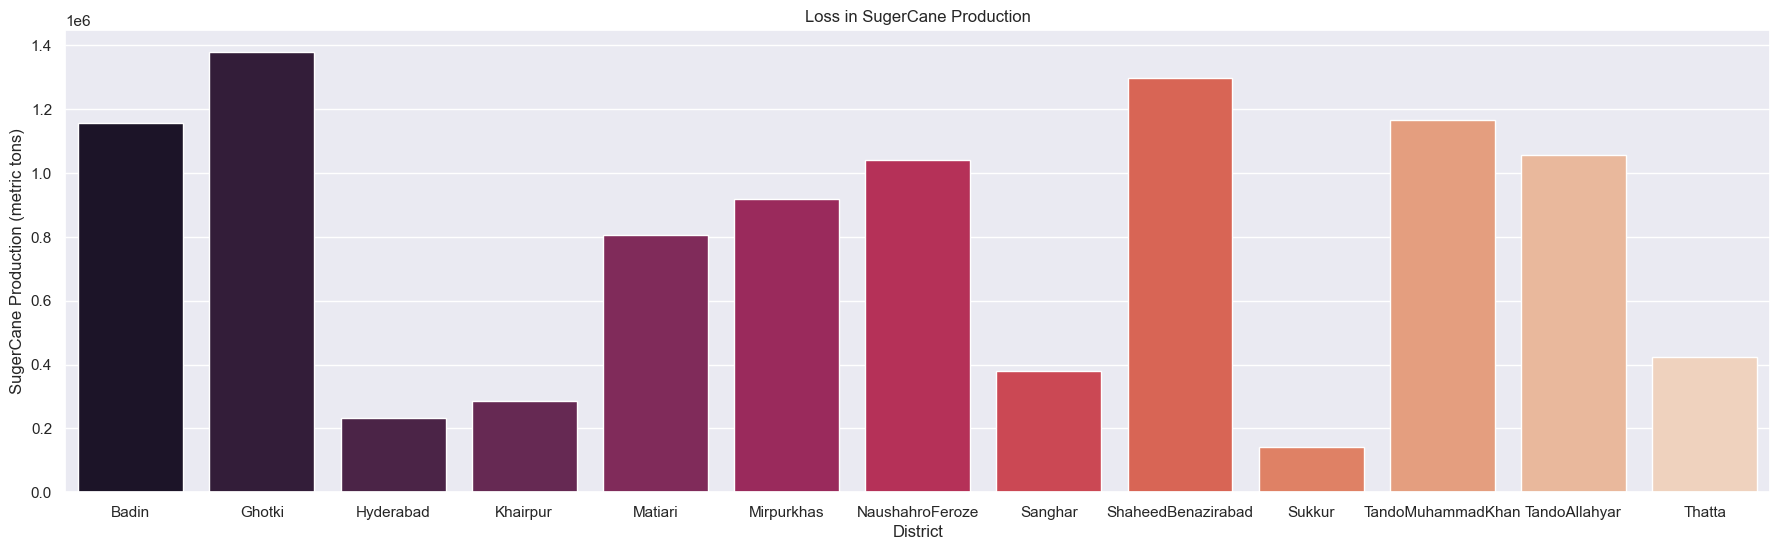

In [125]:
processed_damaged_crops = damaged_crops_df.drop(labels=['Rice production loss (metric tons)','Cotton production loss (bales)'],axis=1)
processed_damaged_crops.dropna(inplace=True)
processed_damaged_crops = processed_damaged_crops[processed_damaged_crops['Sugarcane production loss (metric tons)'] != 'nr']

clean_loss_list = []

lis = processed_damaged_crops['Sugarcane production loss (metric tons)'].to_list()
for i in lis:
    temp = ''
    for x in i.split(','):
        temp = temp + x
    clean_loss_list.append(temp)

processed_damaged_crops['Sugarcane production loss (metric tons)'] = clean_loss_list

processed_damaged_crops['Sugarcane production loss (metric tons)'] = processed_damaged_crops['Sugarcane production loss (metric tons)'].astype('int64')

processed_damaged_crops.reset_index(inplace=True)

processed_damaged_crops.drop(1,inplace=True)
processed_damaged_crops.drop(4,inplace=True)
processed_damaged_crops.drop(5,inplace=True)
processed_damaged_crops.drop(7,inplace=True)
processed_damaged_crops.drop(13,inplace=True)
processed_damaged_crops.drop(17,inplace=True)
processed_damaged_crops.drop(19,inplace=True)

plt.figure(figsize=(22, 6))
sns.set_palette('hls')
ax = sns.barplot(x='District',y='Sugarcane production loss (metric tons)', data=processed_damaged_crops,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Loss in SugerCane Production')
ax.set_ylabel(ylabel='SugerCane Production (metric tons)')
# plt.tight_layout()
plt.show()

Ghotki suffered the most in sugarcane produce this year with more than 1.3 million metric tons lost due to flood

This was followed by ShaheedBenazirabad with around 1.2 million metric tones lost 

Jacobabad, Jamshoro and Thar were the least effected districts for sugarcane production in Sindh

    Analysis of Effected Population

In [126]:
processed_population_df = population_df.drop(labels=0,axis=0)

#To seperate data province wise
ict_start = processed_population_df['Province/ District'].loc[lambda x: x=='Federal Capital Territory'].index[0]
kpk_start = processed_population_df['Province/ District'].loc[lambda x: x=='Khyber Pakhtunkhwa'].index[0]
punjab_start = processed_population_df['Province/ District'].loc[lambda x: x=='Punjab'].index[0]
sindh_start = processed_population_df['Province/ District'].loc[lambda x: x=='Sindh'].index[0]

baloch_df = processed_population_df.iloc[0:ict_start-1]
kpk_df = processed_population_df.iloc[ict_start+1:punjab_start-1]
punjab_df = processed_population_df.iloc[punjab_start-1:sindh_start-1]
sindh_df = processed_population_df.iloc[sindh_start-1:]


Effected population in Balochistan

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\3023734071.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  processed_baloch_df.drop(processed_baloch_df.columns.difference(['Province/ District','Population potentially exposed']), 1,inplace=True)


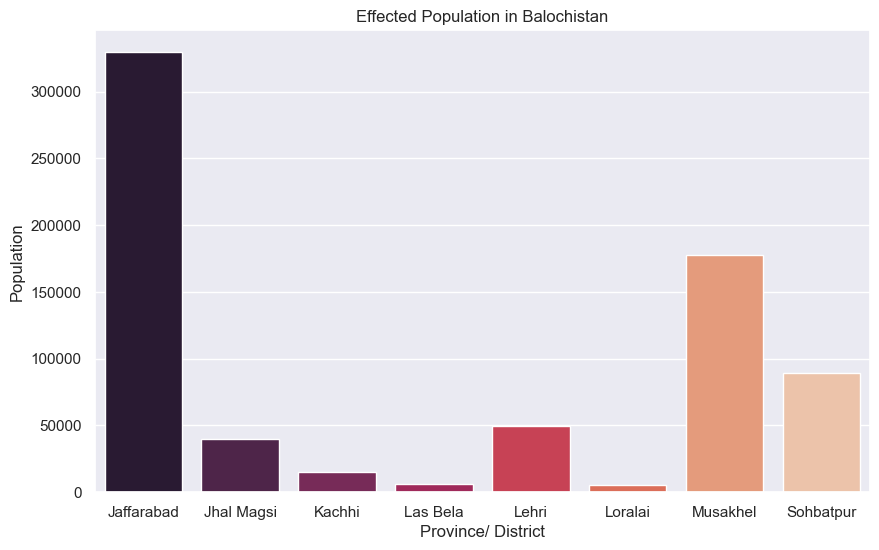

In [135]:
processed_baloch_df = baloch_df.drop(labels=1,axis=0)

processed_baloch_df.drop(processed_baloch_df.columns.difference(['Province/ District','Population potentially exposed']), 1,inplace=True)

processed_baloch_df = processed_baloch_df[processed_baloch_df['Population potentially exposed'] != 0]

processed_baloch_df.reset_index(inplace=True)

processed_baloch_df = processed_baloch_df.loc[[4,5,6,14,15,16,18,25], :]

plt.figure(figsize=(10, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province/ District',y='Population potentially exposed', data=processed_baloch_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Effected Population in Balochistan')
ax.set_ylabel(ylabel='Population')
# plt.tight_layout()
plt.show()

Jaffarabad was the most effected in Balochistan with over 300000 people were impacted by the flood and had to migrate

This was followed by Musakhel with over 150000 people effected then by Sohbatpur which had around 90000 people effected by the flood

People in Awaran, Chagai and Sheerani were the least effected by this flood

Effected Population in KPK

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\3996384011.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  processed_kpk_df.drop(processed_kpk_df.columns.difference(['Province/ District','Population potentially exposed']), 1,inplace=True)


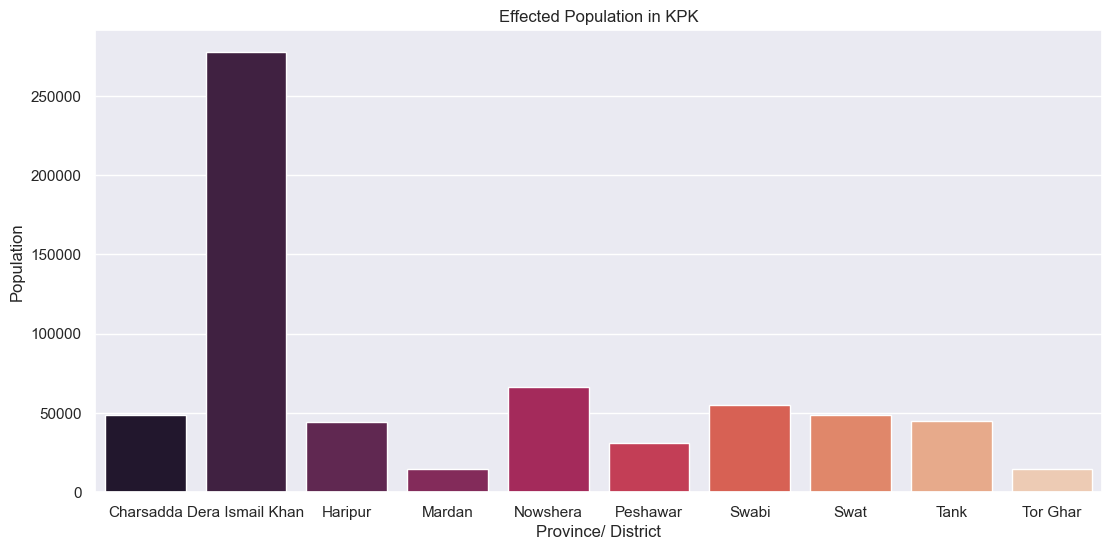

In [142]:
processed_kpk_df = kpk_df.drop(labels=36,axis=0)

processed_kpk_df.drop(processed_kpk_df.columns.difference(['Province/ District','Population potentially exposed']), 1,inplace=True)

processed_kpk_df = processed_kpk_df[processed_kpk_df['Population potentially exposed'] != 0]

processed_kpk_df.reset_index(inplace=True)

processed_kpk_df = processed_kpk_df.loc[[4,6,9,18,21,22,25,26,27,28], :]

plt.figure(figsize=(13, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province/ District',y='Population potentially exposed', data=processed_kpk_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Effected Population in KPK')
ax.set_ylabel(ylabel='Population')
# plt.tight_layout()
plt.show()

We can see that the graph shows that Dera Ismail Khan had the most effected people in KPK which were over 250,000 people

This was followed by Nowshera which had just over 50,000 people effected

People in Abbottabad, Bajaur and FR Dera Ismail Khan were the least effected by this Flood

Effected population in Punjab

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\2779468724.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  processed_punjab_df.drop(processed_punjab_df.columns.difference(['Province/ District','Population potentially exposed']), 1,inplace=True)


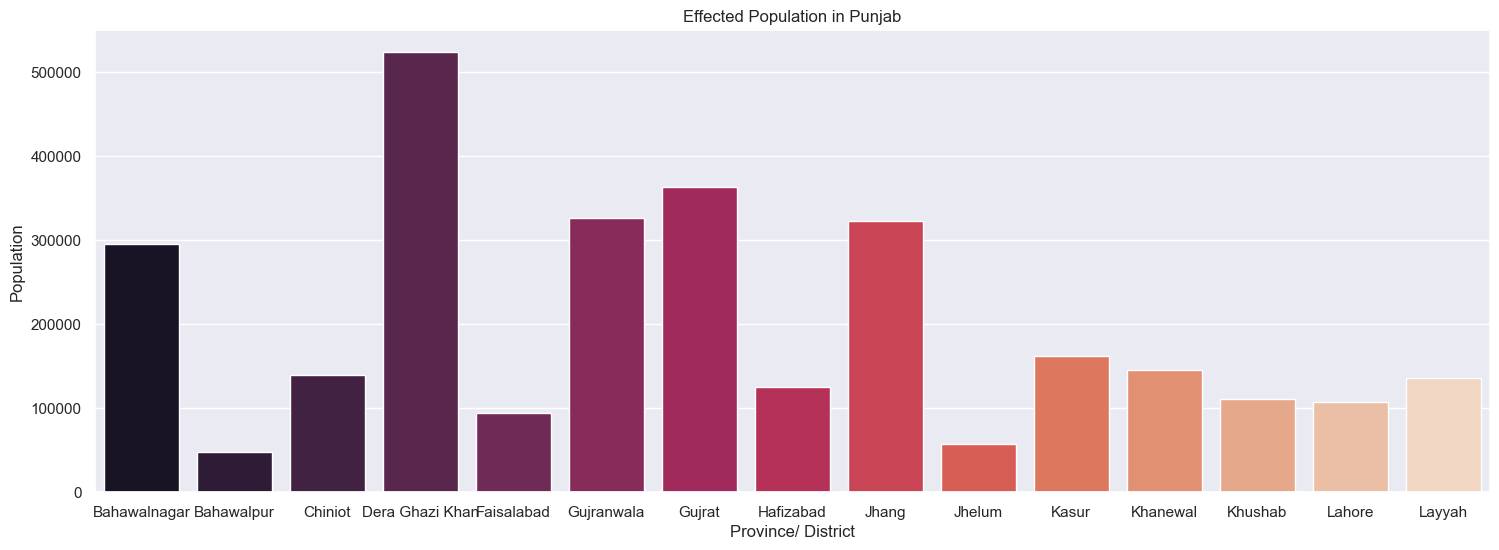

In [150]:
processed_punjab_df = punjab_df.drop(labels=75,axis=0)

processed_punjab_df.drop(processed_punjab_df.columns.difference(['Province/ District','Population potentially exposed']), 1,inplace=True)

processed_punjab_df = processed_punjab_df[processed_punjab_df['Population potentially exposed'] != 0]

processed_punjab_df.reset_index(inplace=True)

processed_punjab_df = processed_punjab_df.loc[[1,2,5,6,7,8,9,10,11,12,13,14,15,16,17], :]

plt.figure(figsize=(18, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province/ District',y='Population potentially exposed', data=processed_punjab_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Effected Population in Punjab')
ax.set_ylabel(ylabel='Population')
# plt.tight_layout()
plt.show()

We can see in this graph that over 120,000 people in Sialkot were effected by this flood

This was followed by Dera Ghazi Khan and Muzaffargarh in which about 50,000 people were effected

People in Bhakkar and Chakwal were the least effected in Punjab

Effected Population in Sindh

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\2281219452.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  processed_sindh_df.drop(processed_sindh_df.columns.difference(['Province/ District','Population potentially exposed']), 1,inplace=True)


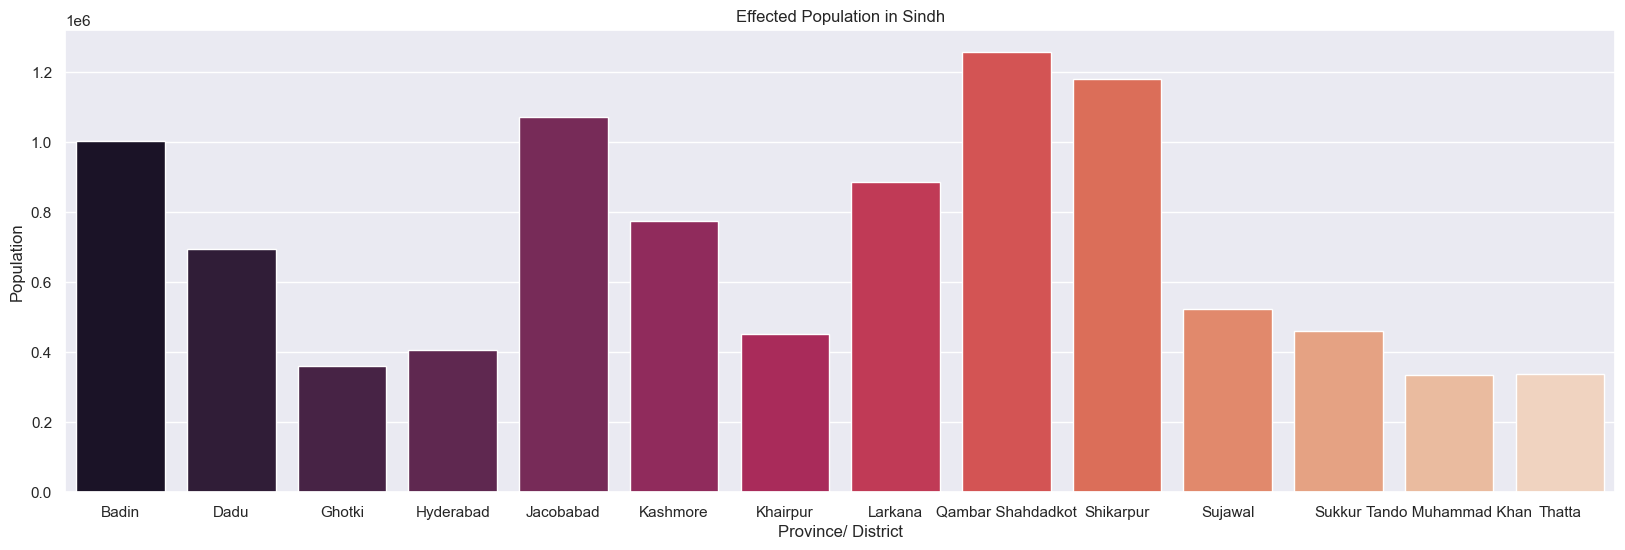

In [164]:
processed_sindh_df = sindh_df.drop(labels=112,axis=0)

processed_sindh_df.drop(processed_sindh_df.columns.difference(['Province/ District','Population potentially exposed']), 1,inplace=True)

processed_sindh_df = processed_sindh_df[processed_sindh_df['Population potentially exposed'] != 0]

processed_sindh_df.reset_index(inplace=True)

processed_sindh_df.drop(5,inplace=True)
processed_sindh_df.drop(6,inplace=True)
processed_sindh_df.drop(10,inplace=True)
processed_sindh_df.drop(11,inplace=True)
processed_sindh_df.drop(19,inplace=True)
processed_sindh_df.drop(21,inplace=True)
processed_sindh_df.drop(23,inplace=True)

processed_sindh_df.reset_index(inplace=True)

processed_sindh_df.drop([8,10,11],inplace=True)

plt.figure(figsize=(20, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province/ District',y='Population potentially exposed', data=processed_sindh_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Effected Population in Sindh')
ax.set_ylabel(ylabel='Population')
# plt.tight_layout()
plt.show()

We can see in this graph that in alot of districts over 50,000 people have been effected

People in Qambar Shahdadkot, Shikarpur and Jacobabad were the most effected in which the number of affectees is over 100,000

Tharparkar and Tando Allah Yar were the least effected

    Analysis of Area under flood

Analysis of Balochistan Land under flood

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\3294483129.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  processed_baloch_df.drop(processed_baloch_df.columns.difference(['Province/ District','Maximum flood water extent\n(km2)']), 1,inplace=True)


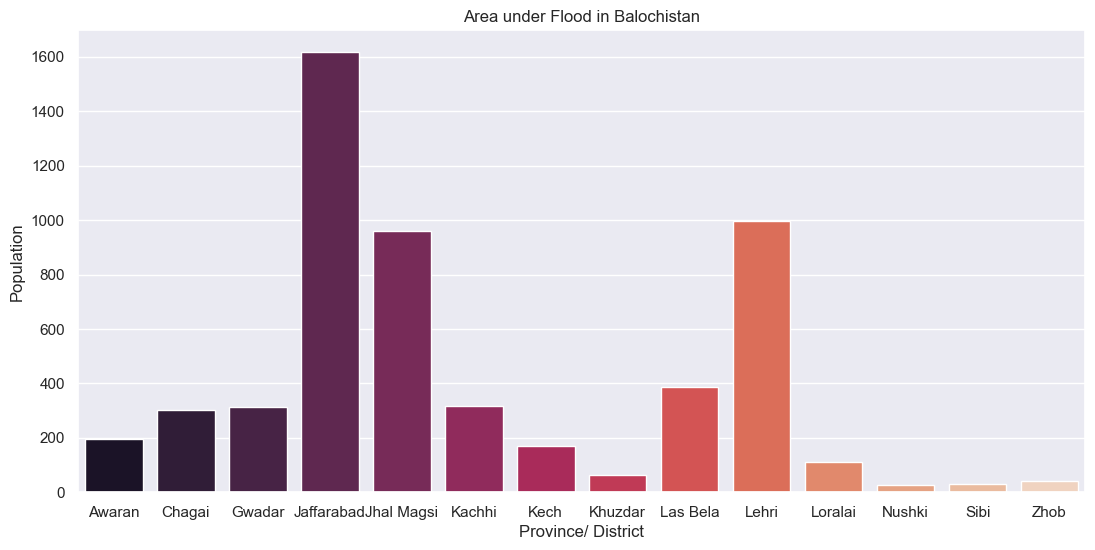

In [172]:
processed_baloch_df = baloch_df.drop(labels=1,axis=0)

processed_baloch_df.drop(processed_baloch_df.columns.difference(['Province/ District','Maximum flood water extent\n(km2)']), 1,inplace=True)

processed_baloch_df = processed_baloch_df[processed_baloch_df['Maximum flood water extent\n(km2)'] != 0]

processed_baloch_df.reset_index(inplace=True)

processed_baloch_df.drop([2,7,9,11,12,13,17,18,20,21,22,23,25,26],inplace=True)

plt.figure(figsize=(13, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province/ District',y='Maximum flood water extent\n(km2)', data=processed_baloch_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Area under Flood in Balochistan')
ax.set_ylabel(ylabel='Population')
# plt.tight_layout()
plt.show()

This graph shows that 1400+ km^2 land in Jaffarabad and Musakhel is covered by flood water 

This is followed by Jhal Magsi and Lehri with 800+ km^2 land covered by flood

Dera Bugti, Kalat and Killa Abdullah were the least effected by flood water

Analysis of KPK Land under Flood

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\171788804.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  processed_kpk_df.drop(processed_kpk_df.columns.difference(['Province/ District','Maximum flood water extent\n(km2)']), 1,inplace=True)


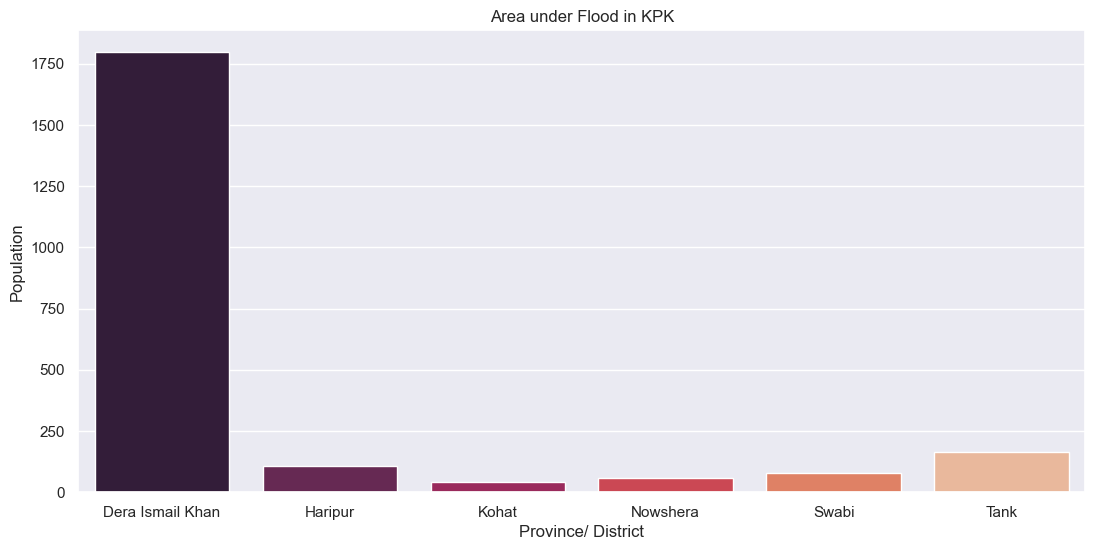

In [177]:
processed_kpk_df = kpk_df.drop(labels=36,axis=0)

processed_kpk_df.drop(processed_kpk_df.columns.difference(['Province/ District','Maximum flood water extent\n(km2)']), 1,inplace=True)

processed_kpk_df = processed_kpk_df[processed_kpk_df['Maximum flood water extent\n(km2)'] != 0]

processed_kpk_df.reset_index(inplace=True)

processed_kpk_df = processed_kpk_df.loc[[4,6,9,18,22,24], :]

plt.figure(figsize=(13, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province/ District',y='Maximum flood water extent\n(km2)', data=processed_kpk_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Area under Flood in KPK')
ax.set_ylabel(ylabel='Population')
# plt.tight_layout()
plt.show()

Dera Ismail Khan was the only district which was the most effected with over 1750km^2 in flood water

The other district had little to no damage in KPK

Analysis of Punjab Land under Flood

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\1668198639.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  processed_punjab_df.drop(processed_punjab_df.columns.difference(['Province/ District','Maximum flood water extent\n(km2)']), 1,inplace=True)


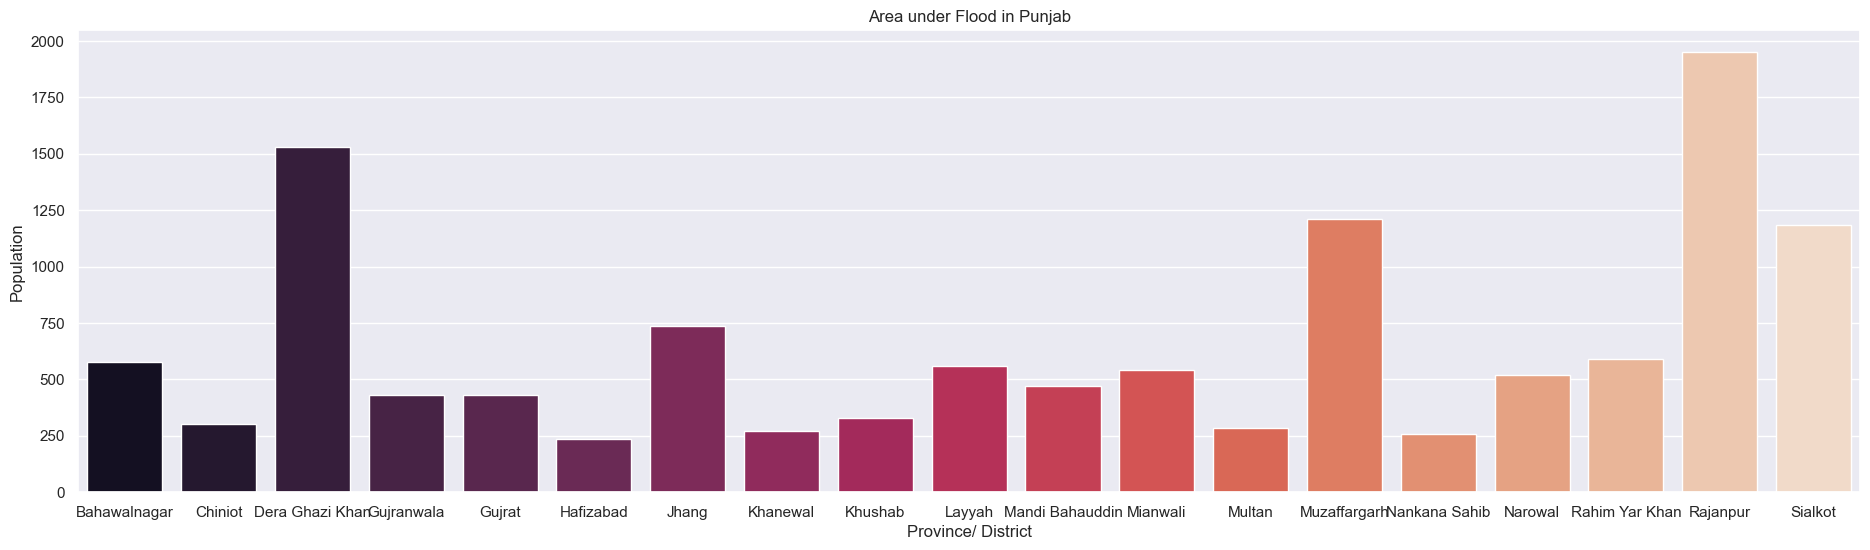

In [189]:
processed_punjab_df = punjab_df.drop(labels=75,axis=0)

processed_punjab_df.drop(processed_punjab_df.columns.difference(['Province/ District','Maximum flood water extent\n(km2)']), 1,inplace=True)

processed_punjab_df = processed_punjab_df[processed_punjab_df['Maximum flood water extent\n(km2)'] != 0]

processed_punjab_df.reset_index(inplace=True)

processed_punjab_df = processed_punjab_df.loc[[1,5,6,8,9,10,11,14,15,17,19,20,21,22,23,24,27,28,33], :]

plt.figure(figsize=(23, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province/ District',y='Maximum flood water extent\n(km2)', data=processed_punjab_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Area under Flood in Punjab')
ax.set_ylabel(ylabel='Population')
# plt.tight_layout()
plt.show()

Around 1500+ km^2 Land in Rajanpur and Dera Ghazi Khan was covered by flood water

Following this is Muzaffargarh and Sialkot which have around 1100+ km^2 covered by flood water

Lahore, Chakwal and Vehari suffered the least by flood water

Analysis of Sindh Land under Flood Water

C:\Users\max55\AppData\Local\Temp\ipykernel_7668\2571169732.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  processed_sindh_df.drop(processed_sindh_df.columns.difference(['Province/ District','Maximum flood water extent\n(km2)']), 1,inplace=True)


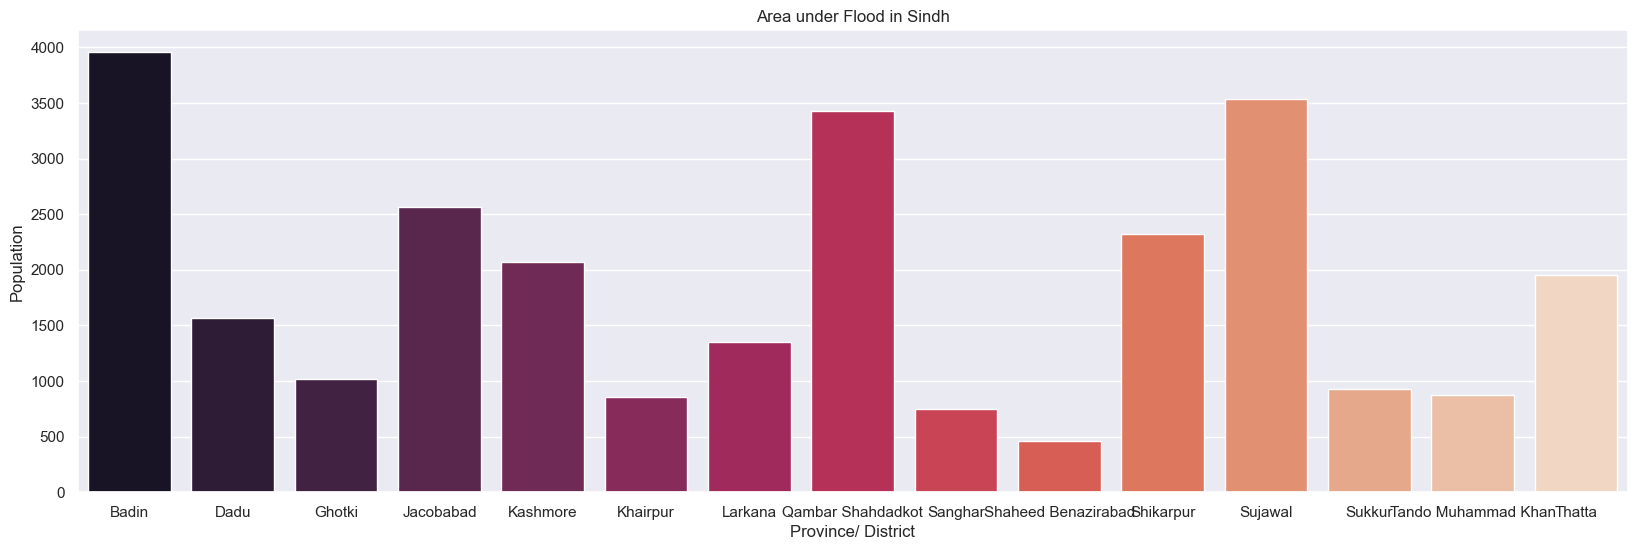

In [200]:
processed_sindh_df = sindh_df.drop(labels=112,axis=0)

processed_sindh_df.drop(processed_sindh_df.columns.difference(['Province/ District','Maximum flood water extent\n(km2)']), 1,inplace=True)

processed_sindh_df = processed_sindh_df[processed_sindh_df['Maximum flood water extent\n(km2)'] != 0]

processed_sindh_df.reset_index(inplace=True)

processed_sindh_df.drop([3,6,10,11,19],inplace=True)

processed_sindh_df.reset_index(inplace=True)

processed_sindh_df.drop([4,8,16,18],inplace=True)

plt.figure(figsize=(20, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province/ District',y='Maximum flood water extent\n(km2)', data=processed_sindh_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Area under Flood in Sindh')
ax.set_ylabel(ylabel='Population')
# plt.tight_layout()
plt.show()

Around 3000+ km^2 land in Badin, Qambar Shahdadkot and Sujawal is covered by flood water

It is followed by Jacobad and Shikarpur with around 2000+ km^2 land damaged

Karachi City and Tando Allah Yar suffered the least

    Analysis of Crops Price Increased due to Flood

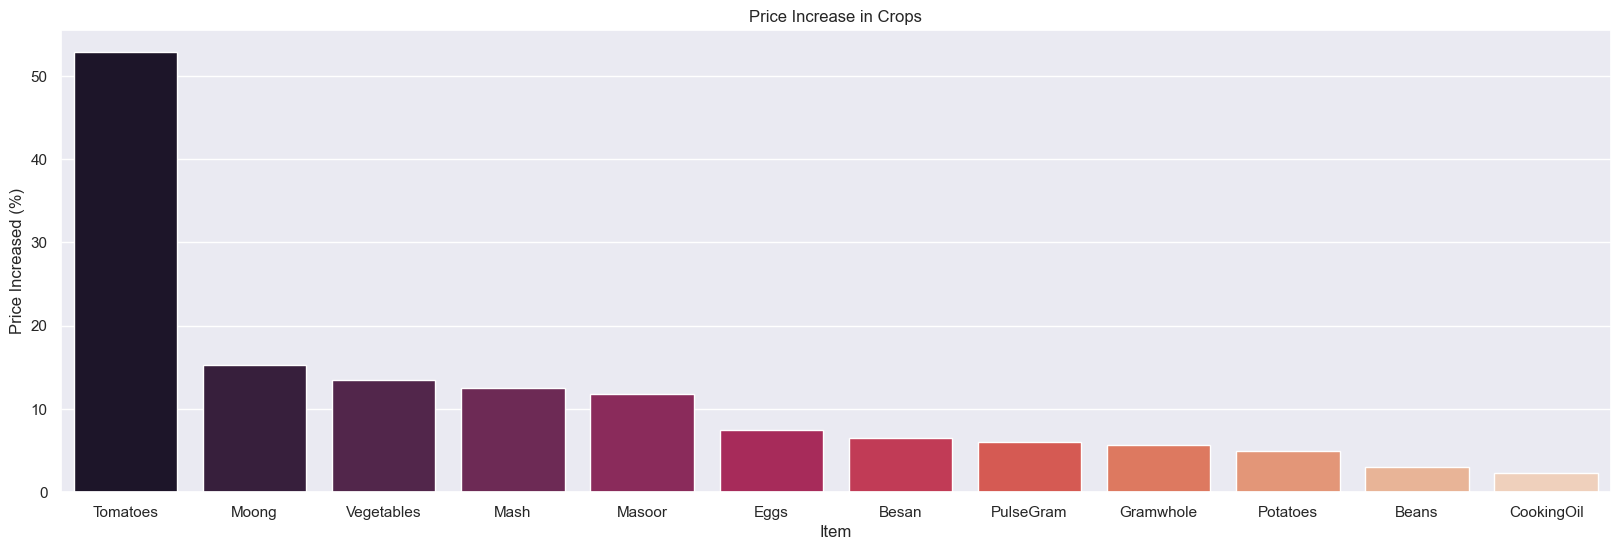

In [201]:
processed_crops_prices = crops_prices_df
processed_crops_prices['Price Increase (%)'] = crops_prices_df['Price Increase (%)'].apply(lambda x: float(x.replace('%','').replace('. ','')))

plt.figure(figsize=(20, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Item',y='Price Increase (%)', data=processed_crops_prices,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Price Increase in Crops')
ax.set_ylabel(ylabel='Price Increased (%)')
# plt.tight_layout()
plt.show()

This graph shows the after effects of flood where tones of crops have been destroyed and since the supply can't meet the demand food prices have sky rocketed

We can see that Tomatoes has seen 50%+ increase in its price while Vegetables Eggs and cooking Oil has seen atleast 5%+ increase in its price

    Analysis of Flood Relief Granted to each province

In [202]:
clean_cash_list = []

lis = relief_df['Cash'].to_list()
for i in lis:
    temp = ''
    for x in i.split(','):
        temp = temp + x
    clean_cash_list.append(temp)

processed_relief_df = relief_df
processed_relief_df['Cash'] = clean_cash_list

processed_relief_df['Cash'] = processed_relief_df['Cash'].astype('int64')

In [203]:
per_mill_list = []

for i in clean_cash_list:
    per_mill_list.append(int(i)/1000000)

processed_relief_df['Cash'] = per_mill_list

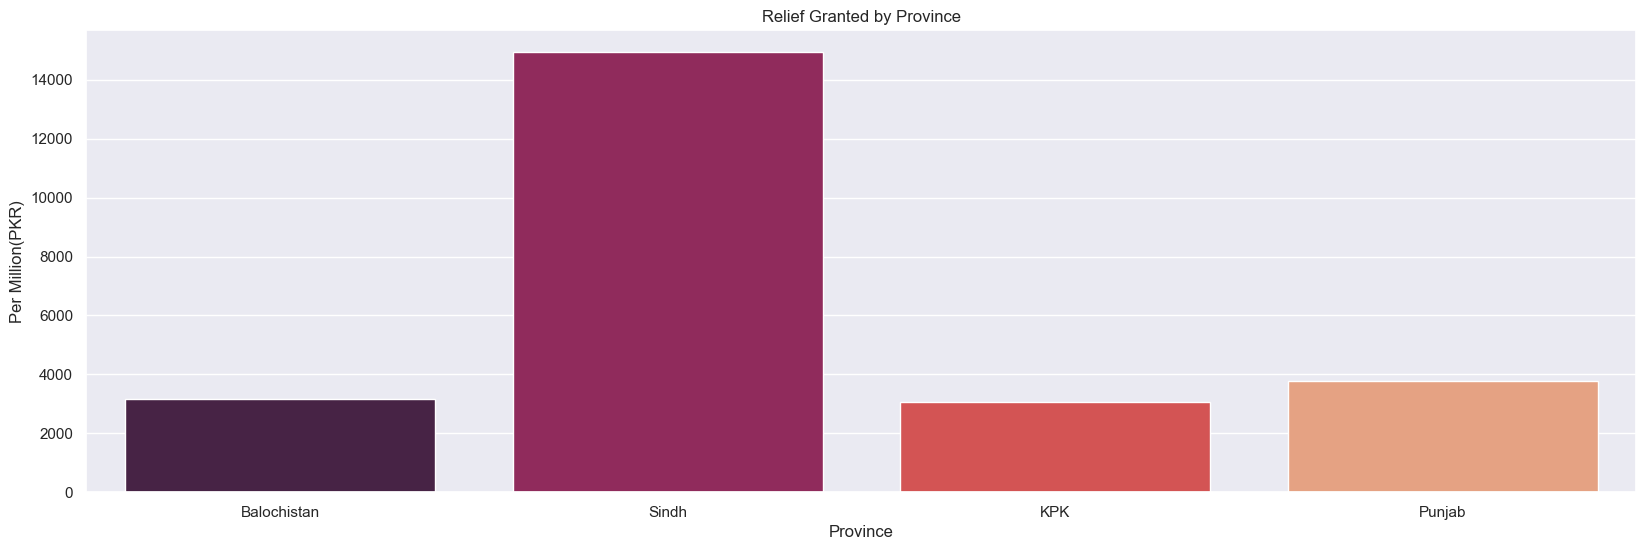

In [204]:
# ax = processed_relief_df.set_index('Province').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
# # ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
# ax.set_ylabel(ylabel='Per million (PKR)')

plt.figure(figsize=(20, 6))
sns.set_palette('hls')
ax = sns.barplot(x='Province',y='Cash', data=processed_relief_df,palette="rocket")
# ax = processed_damaged_crops.set_index('District').plot.bar(rot=90, cmap='tab20', figsize=(12, 6))
ax.set_title('Relief Granted by Province')
ax.set_ylabel(ylabel='Per Million(PKR)')
# plt.tight_layout()
plt.show()

From my analysis of the current flood situation in Pakistan it was clear that Sindh had the most damage in terms of Infrastructure, Crops and Population

Thus Sindh recieved more than 14 billion PKR for relief followed by Punjab with 3.7 billion in relief

Both Balochistan and KPK recieved around 3 billion for relief